In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras import layers,datasets,models

In [6]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [7]:
X_train.shape # first is no of image 32 * 32 size 3 is rgb channel 

(50000, 32, 32, 3)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [20]:
# changing to 2d array to 1 d 
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [21]:
X_test.shape

(10000, 32, 32, 3)

In [22]:
classes = [
"airplane",
"automobile",
"bird",
"cat",
"deer",
"dog",
"frog",
"horse",
"ship",
"truck"]

In [23]:
classes[9]

'truck'

In [24]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

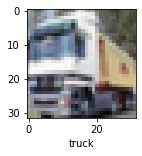

In [25]:
plot_sample(X_train,y_train,1)

In [28]:
X_train = X_train/255
X_test = X_test / 255

In [29]:
# Simple ANN
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
50000/50000 [==============================] - 19s 388us/sample - loss: 1.8572 - acc: 0.3366
Epoch 2/5
50000/50000 [==============================] - 19s 373us/sample - loss: 1.6582 - acc: 0.4129
Epoch 3/5
50000/50000 [==============================] - 20s 397us/sample - loss: 1.5702 - acc: 0.4452
Epoch 4/5
50000/50000 [==============================] - 19s 383us/sample - loss: 1.5088 - acc: 0.4681
Epoch 5/5
50000/50000 [==============================] - 20s 396us/sample - loss: 1.4582 - acc: 0.4842


In [30]:
ann.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 65us/sample - loss: 1.5428 - acc: 0.4531


[1.5428251106262207, 0.4531]

In [31]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.63      0.48      1000
           1       0.53      0.65      0.58      1000
           2       0.46      0.13      0.20      1000
           3       0.38      0.29      0.33      1000
           4       0.35      0.55      0.43      1000
           5       0.60      0.13      0.22      1000
           6       0.57      0.39      0.47      1000
           7       0.51      0.55      0.53      1000
           8       0.44      0.74      0.55      1000
           9       0.54      0.47      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.43     10000
weighted avg       0.48      0.45      0.43     10000



In [32]:
#CNN MODEL  
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [33]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
50000/50000 [==============================] - 6s 127us/sample - loss: 0.6248 - acc: 0.7804
Epoch 2/20
50000/50000 [==============================] - 7s 135us/sample - loss: 0.5935 - acc: 0.7929
Epoch 3/20
50000/50000 [==============================] - 7s 132us/sample - loss: 0.5674 - acc: 0.8035
Epoch 4/20
50000/50000 [==============================] - 6s 127us/sample - loss: 0.5366 - acc: 0.8128
Epoch 5/20
50000/50000 [==============================] - 7s 130us/sample - loss: 0.5101 - acc: 0.8218
Epoch 6/20
50000/50000 [==============================] - 7s 145us/sample - loss: 0.4854 - acc: 0.8291
Epoch 7/20
50000/50000 [==============================] - 7s 131us/sample - loss: 0.4590 - acc: 0.8391
Epoch 8/20
50000/50000 [==============================] - 6s 119us/sample - loss: 0.4374 - acc: 0.8460
Epoch 9/20
50000/50000 [==============================] - 6s 125us/sample - loss: 0.4135 - acc: 0.8545
Epoch 10/20
50000/50000 [==============================] - 6s 117us/sampl

In [52]:
cnn.save('cifar-10.h5')

In [53]:
from tensorflow.keras.models import load_model
cnn1 = load_model("cifar-10.h5")

In [54]:
cnn1.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 1.5550 - acc: 0.6821


[1.555003927230835, 0.6821]

In [55]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6])

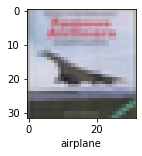

In [56]:
plot_sample(X_test, y_test,3)

In [57]:
y_pred = cnn1.predict(X_test)
y_pred[:5]

array([[4.0287709e-10, 5.8417529e-12, 3.6408476e-08, 9.8194927e-01,
        1.5480849e-08, 1.7993966e-02, 4.8171500e-05, 8.5469119e-06,
        1.6354575e-10, 4.7086150e-12],
       [3.0818508e-05, 1.8441775e-06, 2.8579152e-15, 6.5873850e-15,
        2.3410040e-15, 6.8902751e-18, 1.4666032e-20, 9.1507330e-16,
        9.9996734e-01, 1.8664552e-10],
       [6.0748017e-01, 1.3124700e-02, 3.0124959e-04, 6.7132444e-04,
        2.5939799e-03, 4.5659963e-06, 2.7730573e-07, 5.3506985e-04,
        3.5160244e-01, 2.3686262e-02],
       [9.9644512e-01, 5.7364796e-06, 8.6260581e-04, 7.2716910e-05,
        2.3661479e-03, 1.2433487e-06, 5.2240182e-07, 8.0130238e-05,
        1.6315839e-04, 2.6626403e-06],
       [2.1244611e-09, 7.7672439e-07, 2.8687680e-05, 7.7862380e-05,
        9.8206192e-01, 4.7022109e-05, 1.7783616e-02, 9.6242747e-10,
        5.0640434e-08, 2.8608812e-12]], dtype=float32)

In [58]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6])

In [ ]:
#thank yiu ............